In [4]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values
from ipynb.fs.full.plots import pie_chart

In [5]:
# get formatted and ready to use dataframe
df = get_df()

In [6]:
df.head(10)

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q4_ML_Life_Cycle_Main_Problems_Model_Monitoring_Free_Third,Q4_ML_Life_Cycle_Main_Problems_Model_Other_Free_First,Q4_ML_Life_Cycle_Main_Problems_Model_Other_Free_Second,Q4_ML_Life_Cycle_Main_Problems_Model_Other_Free_Third,Q5_ML_Life_Cycle_Main_Problems_Ranking_Free_First,Q5_ML_Life_Cycle_Main_Problems_Ranking_Free_Second,Q5_ML_Life_Cycle_Main_Problems_Ranking_Free_Third,Q6_ML_Solution_Optimality,Q7_ML_Solution_Optimality_Extra_Effort,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,Feeding the model in appropriate way,-99,-99,-99,Problems with data collection and cleaning,Others tasks which competes the time,Search the appropriate methodology,Frequently,70,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,-99,-99,-99,-99,-99,-99,-99,Never,-77,-99
4,36,Completed (31),1593,Mathematics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,-99,-99,-99,-99,Data preparation,Prediction Task identification,Selecionar of learning algo,Sometimes,30,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,-99,-99,-99,-99,-99,-99,-99,Sometimes,50,-99
6,46,Completed (31),2821,Actuarial Science,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,-99,-99,-99,-99,understand the pain and identify if ML is real...,we need to cut or we need to cluster some kind...,present and discuss metrics and distribution o...,Sometimes,20,-99
7,53,Completed (31),2097,Information System,-99,M.Sc. in Applied Informatics,-99,-99,-99,Brazil,...,-99,-99,-99,-99,insufficient amount of data,apply the models,Not knowing how to deploy,Sometimes,50,-99
8,58,Completed (31),1696,Computer Science,-99,Computer Science,-99,Microsoft Professional Program Data Science & ...,-99,Germany,...,-99,-99,-99,-99,Data Availability,Sufficient Data Quantity,Deployment Costs for non-trivial ML projects,Sometimes,30,https://t.co/
9,64,Completed (31),1250,Electrical and Electronics Engineering,-99,M.Sc. in AI and Software Engineering,Computer science,"Azure Associate AI Engineer, Azure Data Scienc...",-99,Sweden,...,-99,-99,-99,-99,"Basic: no proper engagement from management, n...",Understand the context,-99,Sometimes,50,https://www.linkedin.com/
10,65,Completed (31),106,-99,-99,-99,-99,-99,-99,0,...,-99,-99,-99,-99,-99,-99,-99,Never,-77,-99
11,69,Completed (31),79,-99,-99,-99,-99,-99,-99,0,...,-99,-99,-99,-99,-99,-99,-99,Never,-77,https://ww2.unipark.de/uc/seml/


In [7]:
df['D11_Agile_Development'].unique()

array(['Totally traditional', 'Balanced between agile and traditional',
       'Totally agile', 'Mostly agile', '0', "I don't know",
       'Mostly traditional'], dtype=object)

In [8]:
# total answers of each label
df['D11_Agile_Development'].value_counts()


Mostly agile                              89
Balanced between agile and traditional    77
Totally traditional                       41
Mostly traditional                        29
Totally agile                             23
I don't know                              16
0                                          1
Name: D11_Agile_Development, dtype: int64

In [9]:
# mapping of old labels to new one
d11_rename_mapping = {
    'Mostly agile': 'Mostly agile',
    'Balanced between agile and traditional': 'Balanced between agile and traditional',
    'Totally traditional': 'Totally traditional',
    'Mostly traditional': 'Mostly traditional',
    'Totally agile': 'Totally agile',
    "I don't know": "I don't know"
}

In [10]:
# labels of our pie chart
labels = list(df['D11_Agile_Development'].value_counts().index)
# total answers of each label
values = list(df['D11_Agile_Development'].value_counts())

In [11]:
# normalize to the sum become 100
sum_values = sum(values)
normalized_values = [(float(v)/sum_values)* 100 for v in values]

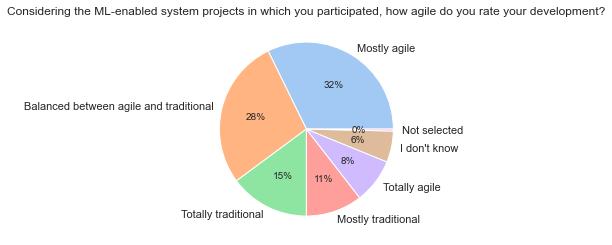

In [12]:
pie_chart(normalized_values, rename_values(d11_rename_mapping, labels), 
          title="Considering the ML-enabled system projects in which you participated, how agile do you rate your development?")

In [13]:
# Now plot it!
import plot_likert
import pandas as pd

In [22]:


dic = {}
for palavra in list(df['D11_Agile_Development']):
    qt = dic.get(palavra,0)
    dic[palavra]=qt+1

valor = dic.values()
chaves = dic.keys()
dic=dict(zip(valor, chaves))
print(dic)
dic2 ={41: 'Totally traditional', 77: 'Balanced between agile and traditional', 23: 'Totally agile', 89: 'Mostly agile', 29: 'Mostly traditional'}
data = pd.DataFrame({'d11':dic2})
print(data)

{41: 'Totally traditional', 77: 'Balanced between agile and traditional', 23: 'Totally agile', 89: 'Mostly agile', 1: '0', 16: "I don't know", 29: 'Mostly traditional'}
                                       d11
23                           Totally agile
29                      Mostly traditional
41                     Totally traditional
77  Balanced between agile and traditional
89                            Mostly agile


<AxesSubplot:xlabel='Percentage of Responses'>

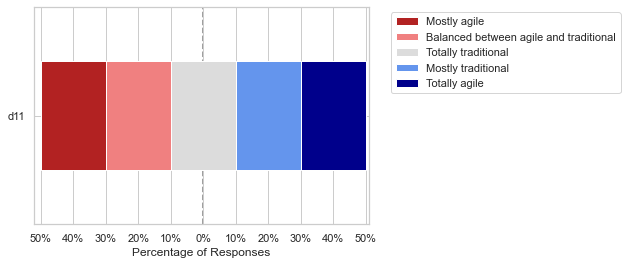

In [23]:
plot_likert.plot_likert(data, labels, plot_percentage=True)